In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Anto\DataScience-main\Practice Projects\Auto insruance fraud\insurance fraud claims.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
 df['policy_annual_premium'] = df['policy_annual_premium'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   int64  
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [11]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,":", df[i].nunique())

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


In [12]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

###### We have '?' in three of the columns[collision_type,property_damage,police_report_available] and will replace that with NaN

In [13]:
df.replace('?',np.nan,inplace=True)

###### Replace the NaN with mode for the columns with NaN

In [14]:
df['collision_type'].mode()[0]

'Rear Collision'

In [15]:
df['collision_type'] =df['collision_type'].fillna(df['collision_type'].mode()[0])

In [16]:
df['collision_type']

0       Side Collision
1       Rear Collision
2       Rear Collision
3      Front Collision
4       Rear Collision
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999     Rear Collision
Name: collision_type, Length: 1000, dtype: object

In [17]:
df['property_damage'] =df['property_damage'].fillna(df['property_damage'].mode()[0])

In [18]:
df['police_report_available'] =df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [19]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [20]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [21]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [22]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium            int64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

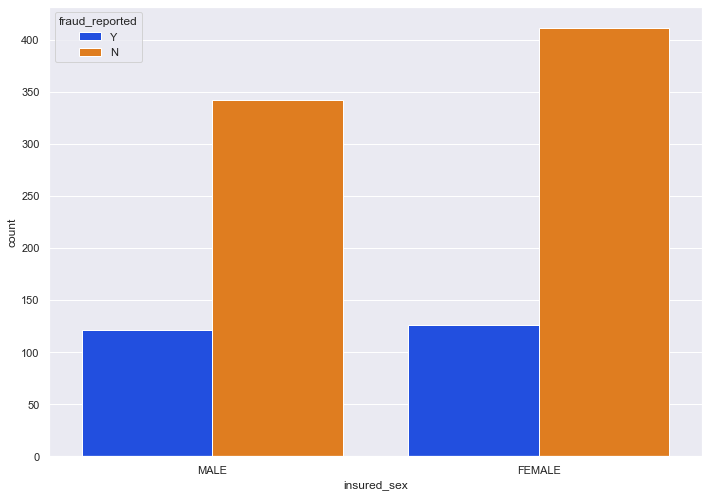

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=df,x='insured_sex',hue='fraud_reported',palette='bright')

In [24]:
countplot_columns = ['insured_sex','incident_type','collision_type','incident_severity','witnesses','property_damage','authorities_contacted']

In [25]:
list(enumerate(countplot_columns))

[(0, 'insured_sex'),
 (1, 'incident_type'),
 (2, 'collision_type'),
 (3, 'incident_severity'),
 (4, 'witnesses'),
 (5, 'property_damage'),
 (6, 'authorities_contacted')]

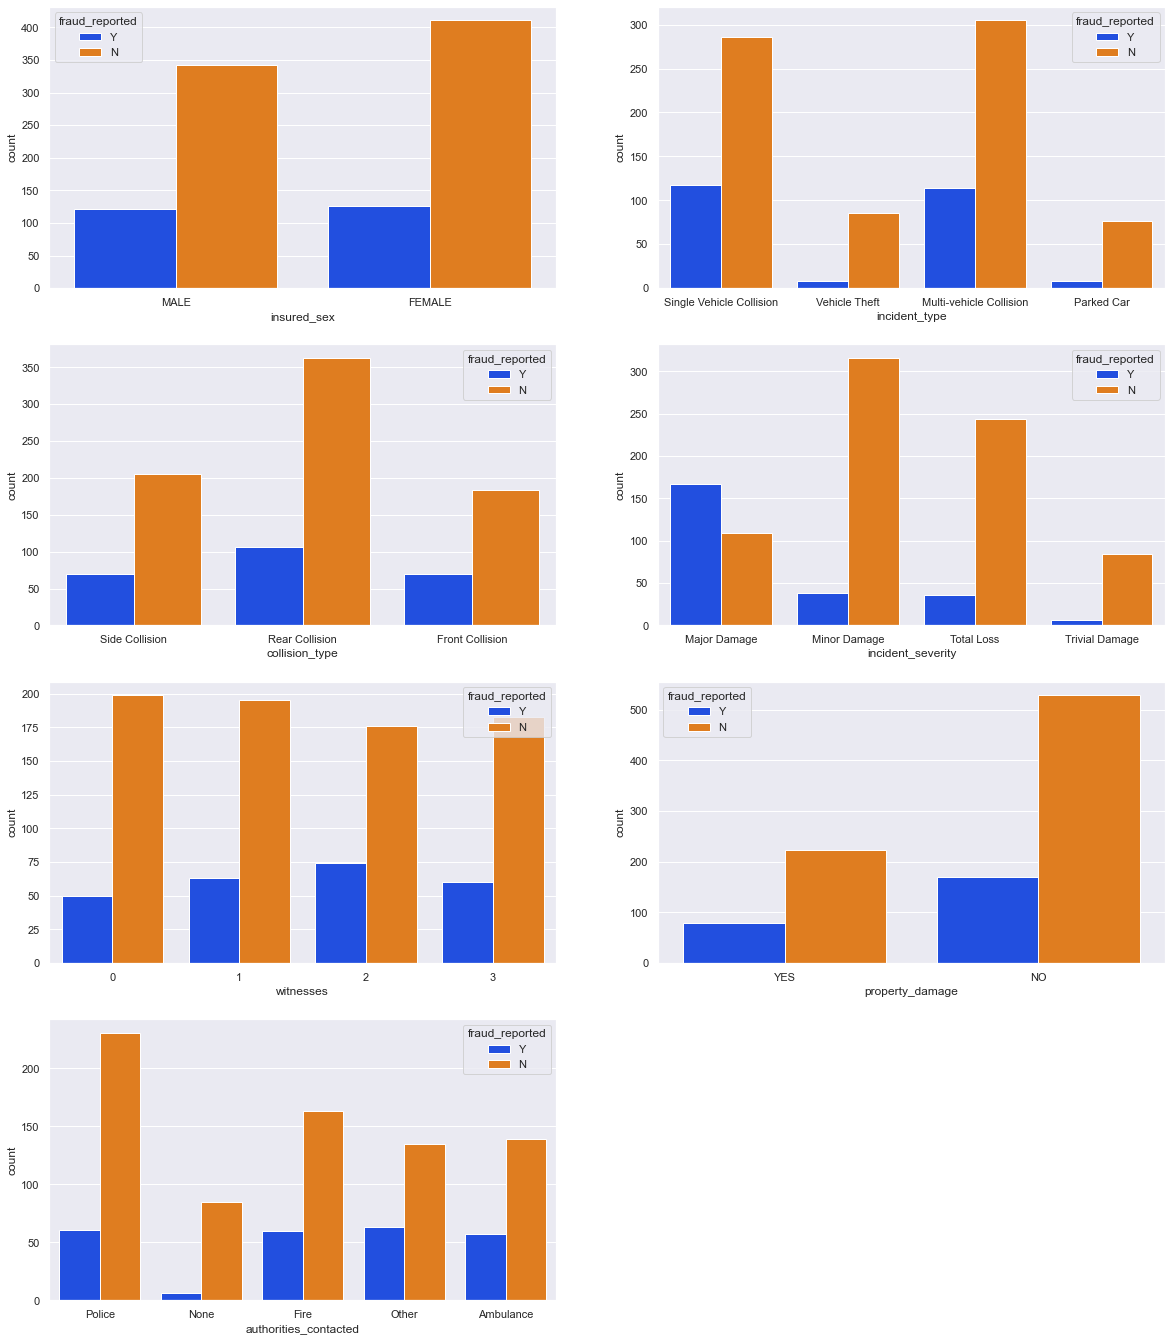

In [26]:
plt.figure(figsize=[20,30])
for i in enumerate(countplot_columns):
    plt.subplot(5,2,i[0]+1)
    sns.countplot(data=df, x =i[1],hue='fraud_reported',palette='bright')

In [27]:
histplot_columns = ['policy_deductable','policy_annual_premium', 'umbrella_limit','capital-gains','capital-loss','months_as_customer','age','total_claim_amount']

In [28]:
list(enumerate(histplot_columns))

[(0, 'policy_deductable'),
 (1, 'policy_annual_premium'),
 (2, 'umbrella_limit'),
 (3, 'capital-gains'),
 (4, 'capital-loss'),
 (5, 'months_as_customer'),
 (6, 'age'),
 (7, 'total_claim_amount')]

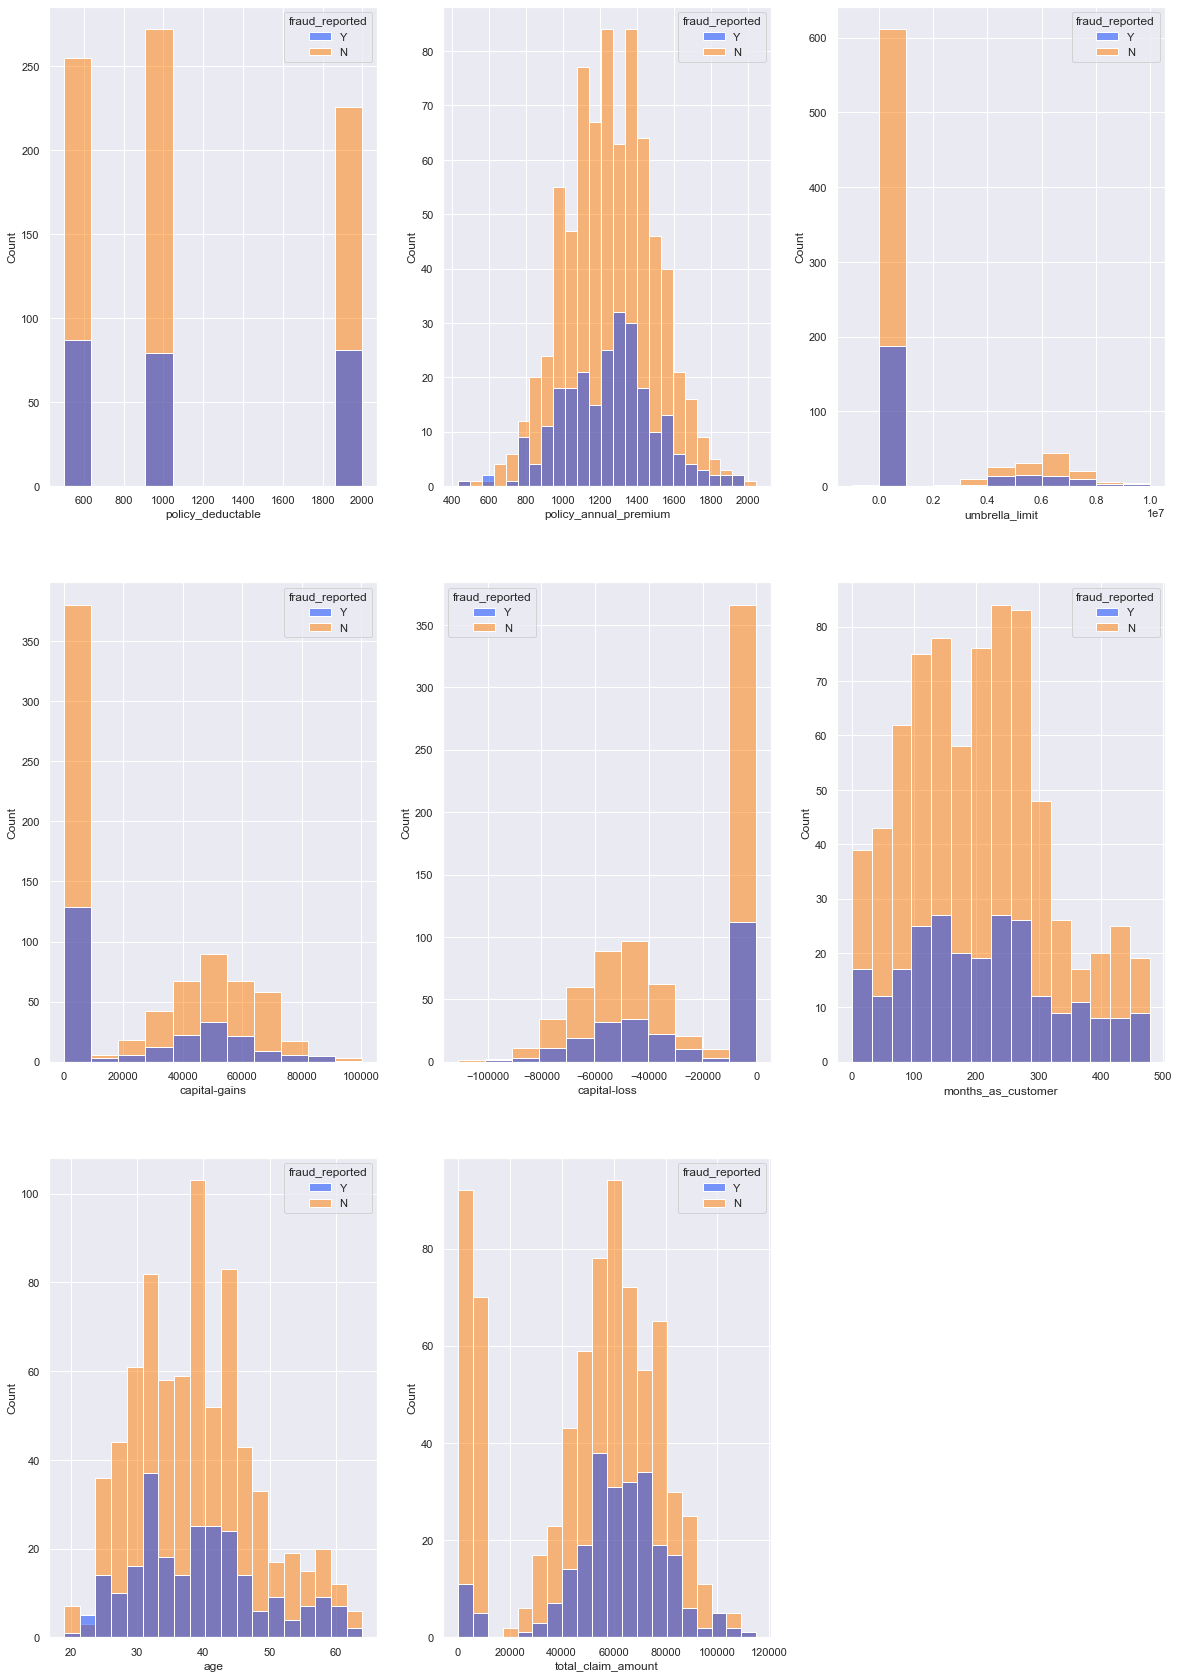

In [29]:
plt.figure(figsize=[20,30])
for z in enumerate(histplot_columns):
    plt.subplot(3,3,z[0]+1)
    sns.histplot(df,x =z[1],hue='fraud_reported',palette='bright')

In [30]:
sns.set(rc={'figure.figsize':(20,20)})

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

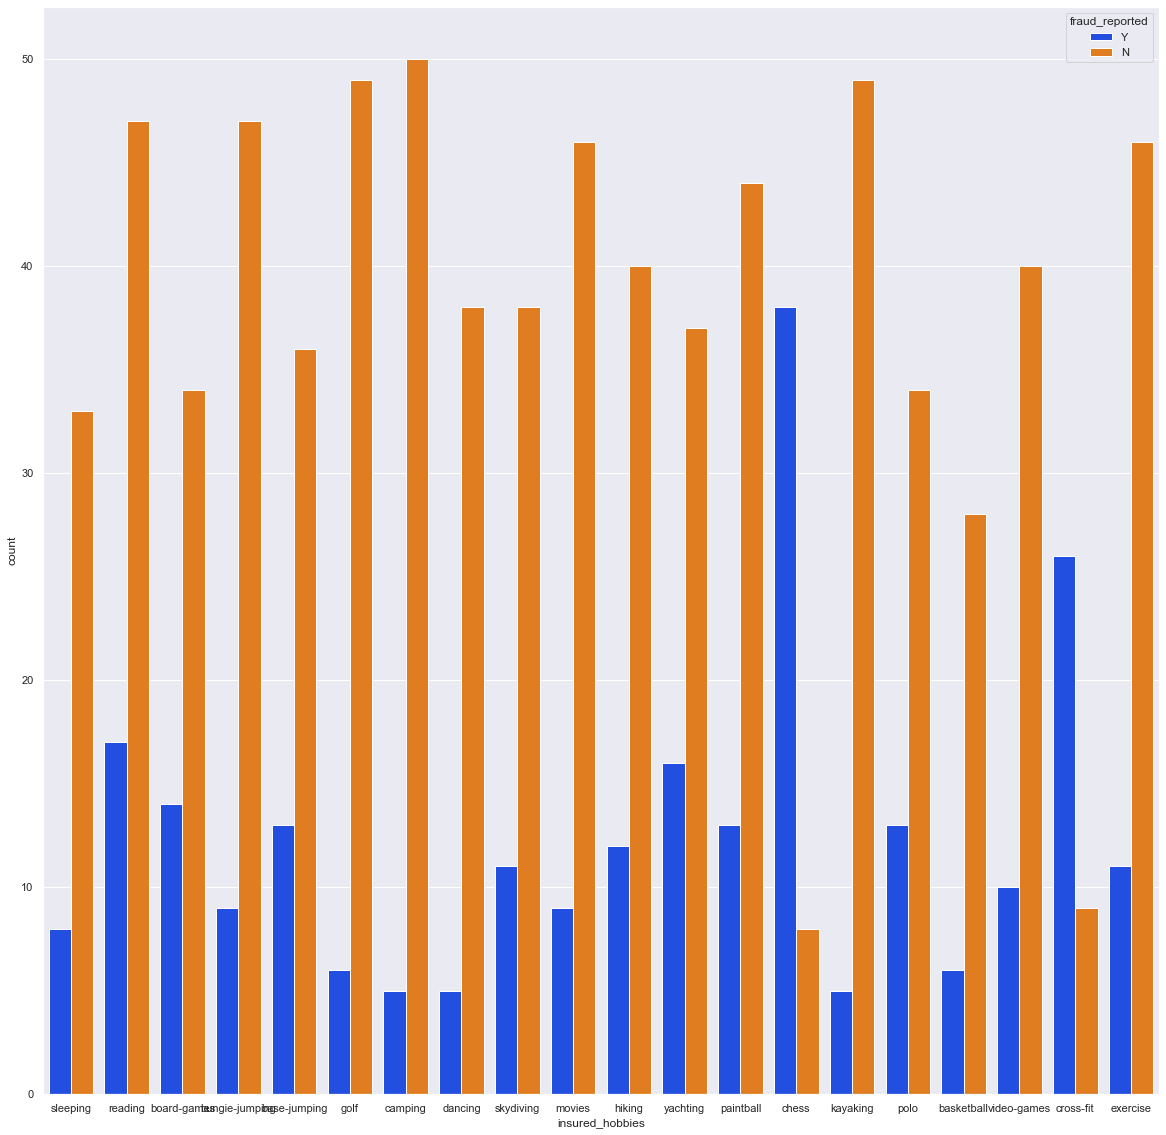

In [31]:
sns.countplot(x='insured_hobbies',data=df,hue='fraud_reported',palette='bright')

<AxesSubplot:xlabel='auto_model', ylabel='count'>

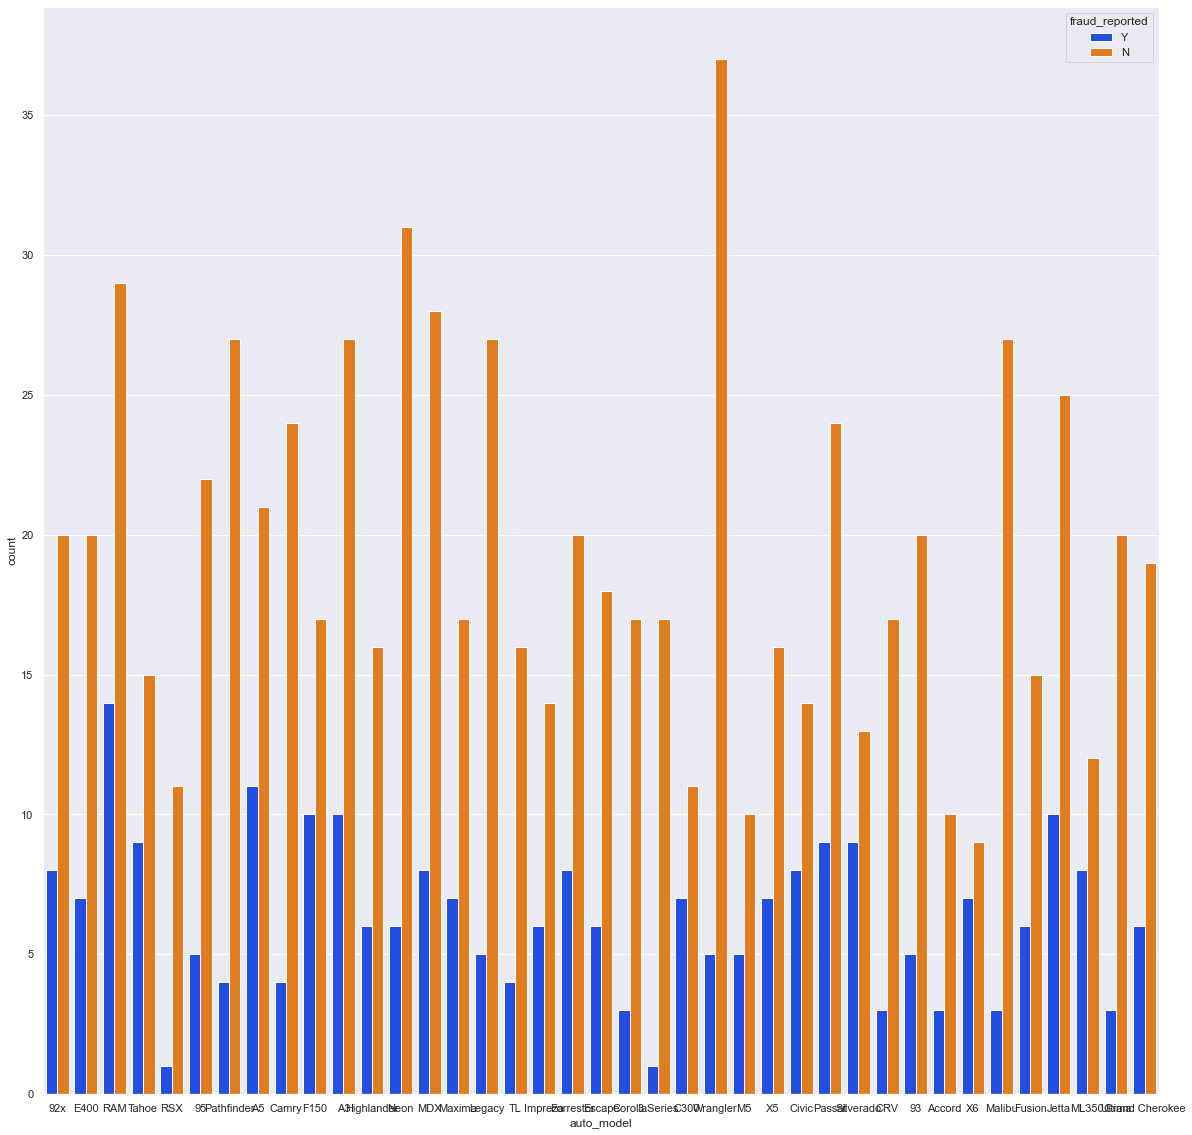

In [32]:
sns.countplot(data=df,x='auto_model',hue='fraud_reported',palette='bright')

In [33]:
df['fraud_reported'] = pd.get_dummies(df['fraud_reported'],drop_first=True)

In [34]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310,0,431289,...,NO,87200,17440,8720,61040,Honda,Accord,2006,0,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436,0,608177,...,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,0,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,0,NaN


<AxesSubplot:>

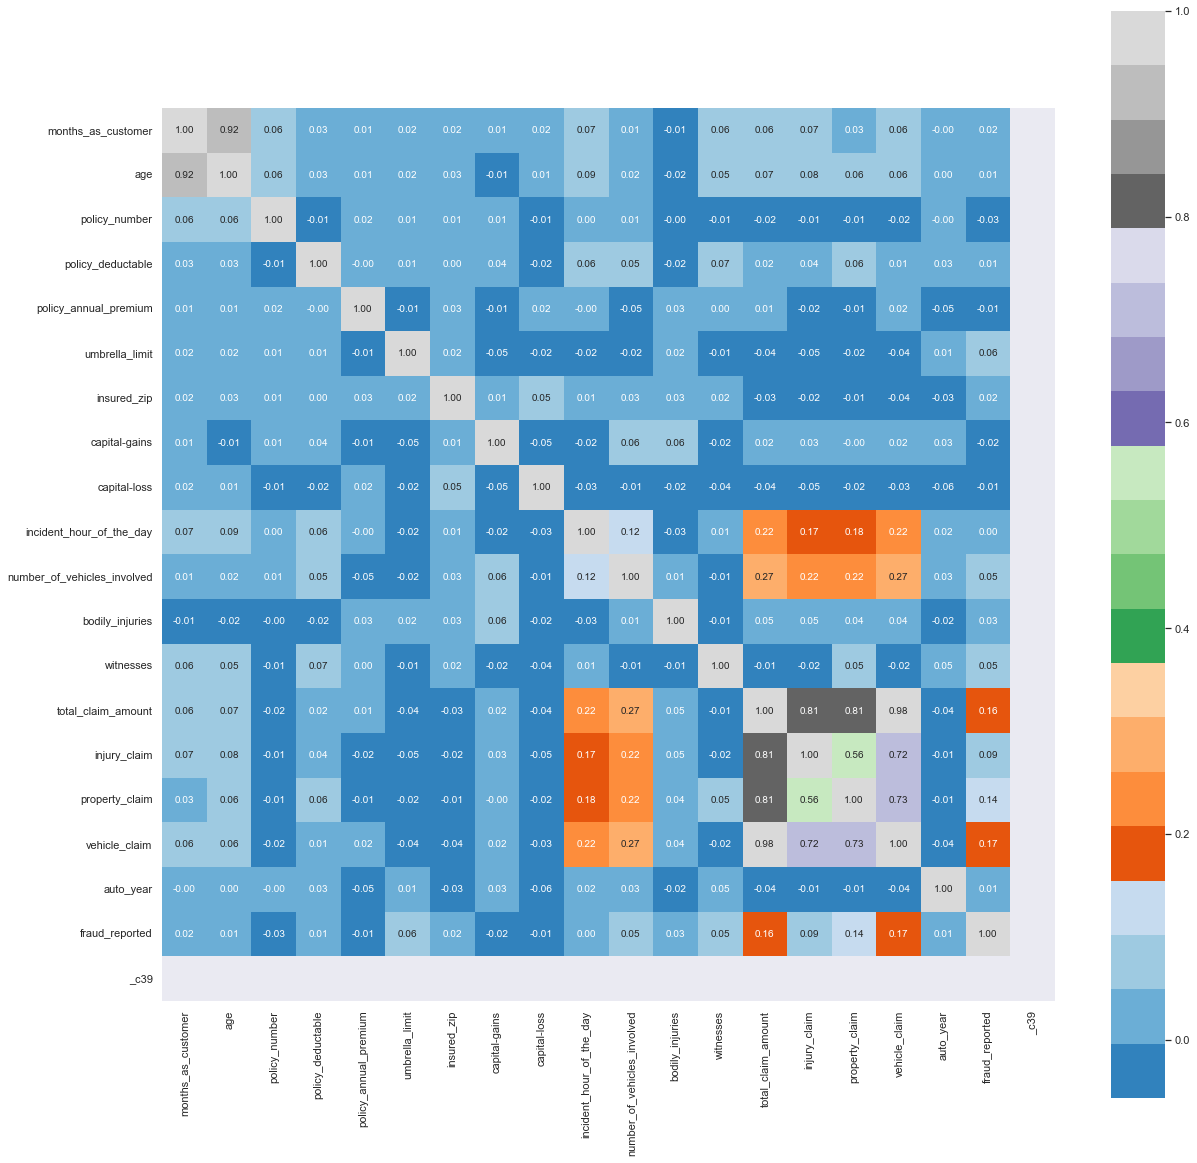

In [35]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(),annot=True,cbar=True,square=True,cmap='tab20c',annot_kws={'size': 10},fmt='.2f')

<AxesSubplot:>

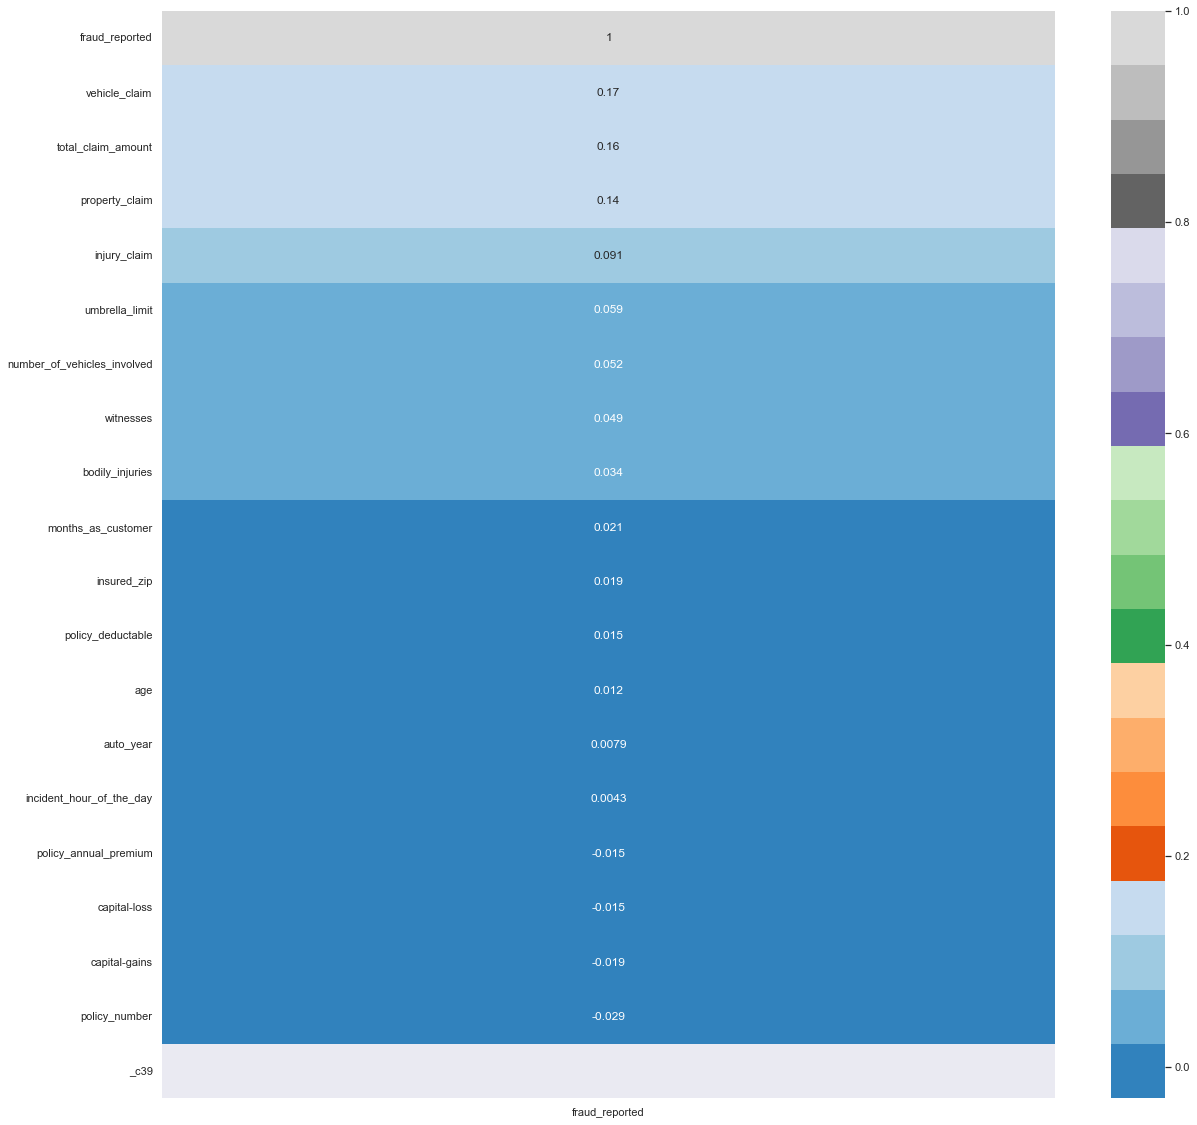

In [36]:
sns.heatmap(df.corr()[['fraud_reported']].nlargest(40,'fraud_reported'),annot=True,cmap='tab20c')

In [37]:
col_drop = ['policy_number','policy_bind_date','policy_state','policy_csl','policy_annual_premium','insured_zip','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_state','incident_city','incident_location','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','_c39']

In [38]:
df.drop(col_drop,axis=1,inplace=True)

In [39]:
df

,months_as_customer,age,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,fraud_reported
0,328,48,1000,0,MALE,MD,craft-repair,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,1
1,228,42,2000,5000000,MALE,MD,machine-op-inspct,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,1
2,134,29,2000,5000000,FEMALE,PhD,sales,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,0
3,256,41,2000,6000000,FEMALE,PhD,armed-forces,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,1
4,228,44,1000,6000000,MALE,Associate,sales,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0,FEMALE,Masters,craft-repair,Single Vehicle Collision,Front Collision,Minor Damage,Fire,20,1,YES,0,1,NO,87200,0
996,285,41,1000,0,FEMALE,PhD,prof-specialty,Single Vehicle Collision,Rear Collision,Major Damage,Fire,23,1,YES,2,3,NO,108480,0
997,130,34,500,3000000,FEMALE,Masters,armed-forces,Multi-vehicle Collision,Side Collision,Minor Damage,Police,4,3,NO,2,3,YES,67500,0
998,458,62,2000,5000000,MALE,Associate,handlers-cleaners,Single Vehicle Collision,Rear Collision,Major Damage,Other,2,1,NO,0,1,YES,46980,0


In [40]:
df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'fraud_reported'],
      dtype='object')

In [41]:
feature_columns= ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount']

In [42]:
target_columns = ['fraud_reported']

In [43]:
df

,months_as_customer,age,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,fraud_reported
0,328,48,1000,0,MALE,MD,craft-repair,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,1
1,228,42,2000,5000000,MALE,MD,machine-op-inspct,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,1
2,134,29,2000,5000000,FEMALE,PhD,sales,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,0
3,256,41,2000,6000000,FEMALE,PhD,armed-forces,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,1
4,228,44,1000,6000000,MALE,Associate,sales,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0,FEMALE,Masters,craft-repair,Single Vehicle Collision,Front Collision,Minor Damage,Fire,20,1,YES,0,1,NO,87200,0
996,285,41,1000,0,FEMALE,PhD,prof-specialty,Single Vehicle Collision,Rear Collision,Major Damage,Fire,23,1,YES,2,3,NO,108480,0
997,130,34,500,3000000,FEMALE,Masters,armed-forces,Multi-vehicle Collision,Side Collision,Minor Damage,Police,4,3,NO,2,3,YES,67500,0
998,458,62,2000,5000000,MALE,Associate,handlers-cleaners,Single Vehicle Collision,Rear Collision,Major Damage,Other,2,1,NO,0,1,YES,46980,0


In [44]:
X = df[feature_columns]
y = df[target_columns]

In [45]:
X.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount'],
      dtype='object')

In [46]:
y.columns

Index(['fraud_reported'], dtype='object')

###### Split into Train and Test 

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
cat_df_X_train = X_train.select_dtypes(include = ['object'])

In [50]:
for col in cat_df_X_train.columns:
    print(f"{col}: \n{cat_df_X_train[col].unique()}\n")

insured_sex: 
['FEMALE' 'MALE']

insured_education_level: 
['PhD' 'College' 'Masters' 'JD' 'MD' 'Associate' 'High School']

insured_occupation: 
['machine-op-inspct' 'sales' 'farming-fishing' 'craft-repair'
 'transport-moving' 'prof-specialty' 'armed-forces' 'exec-managerial'
 'adm-clerical' 'priv-house-serv' 'handlers-cleaners' 'protective-serv'
 'tech-support' 'other-service']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Parked Car'
 'Multi-vehicle Collision']

collision_type: 
['Rear Collision' 'Side Collision' 'Front Collision']

incident_severity: 
['Minor Damage' 'Major Damage' 'Trivial Damage' 'Total Loss']

authorities_contacted: 
['Police' 'Other' 'Ambulance' 'None' 'Fire']

property_damage: 
['NO' 'YES']

police_report_available: 
['NO' 'YES']



In [51]:
cat_df_X_train.columns

Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available'],
      dtype='object')

In [52]:
cat_df_X_train

,insured_sex,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
29,FEMALE,PhD,machine-op-inspct,Single Vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
535,FEMALE,College,sales,Single Vehicle Collision,Side Collision,Major Damage,Other,NO,YES
695,FEMALE,Masters,farming-fishing,Vehicle Theft,Rear Collision,Trivial Damage,Police,NO,NO
557,MALE,PhD,craft-repair,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,YES
836,FEMALE,JD,transport-moving,Single Vehicle Collision,Rear Collision,Total Loss,Police,NO,YES
...,...,...,...,...,...,...,...,...,...
106,FEMALE,Associate,prof-specialty,Multi-vehicle Collision,Rear Collision,Major Damage,Police,NO,YES
270,MALE,College,handlers-cleaners,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,YES
860,FEMALE,MD,adm-clerical,Multi-vehicle Collision,Rear Collision,Minor Damage,Other,NO,YES
435,MALE,MD,machine-op-inspct,Single Vehicle Collision,Side Collision,Total Loss,Police,NO,NO


In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
enc = OneHotEncoder(handle_unknown='ignore',drop='first')
cat_enc_data_X_train=pd.DataFrame(enc.fit_transform(X_train[['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available']]).toarray())

##enc_data =enc.fit(X_train[['insured_sex', 'insured_education_level', 'insured_occupation','incident_type', 'collision_type', 'incident_severity','authorities_contacted', 'property_damage', 'police_report_available']]).toarray()
##enc_data = enc.transform(X_train[['insured_sex', 'insured_education_level', 'insured_occupation','incident_type', 'collision_type', 'incident_severity','authorities_contacted', 'property_damage', 'police_report_available']]).toarray()

In [55]:
##enc_data = pd.DataFrame(enc_data)

In [56]:
##cat_df_X_train.shape

In [57]:
cat_enc_data_X_train

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
796,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
797,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
798,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
enc.get_feature_names_out()

array(['insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'in

In [59]:
cat_enc_data_X_train.columns = enc.get_feature_names_out()

In [60]:
cat_enc_data_X_train

,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
796,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
797,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
798,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
cat_enc_data_X_train.reset_index(drop=True, inplace=True)

In [62]:
cat_enc_data_X_train

,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
796,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
797,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
798,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
num_df_X_train = X_train.select_dtypes(include = ['int64'])

In [64]:
num_df_X_train

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount
29,241,45,2000,0,5,1,2,2,91650
535,65,23,1000,0,14,1,1,0,52400
695,289,45,2000,0,9,1,2,1,2700
557,63,26,500,6000000,5,1,0,2,5160
836,257,43,1000,0,0,1,0,1,85320
...,...,...,...,...,...,...,...,...,...
106,464,61,1000,0,6,3,0,2,79800
270,369,55,2000,0,6,3,2,0,85300
860,230,42,1000,0,13,3,1,2,58850
435,102,28,500,0,6,1,1,0,73400


In [65]:
num_df_X_train.reset_index(drop=True, inplace=True)

In [66]:
num_df_X_train

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount
0,241,45,2000,0,5,1,2,2,91650
1,65,23,1000,0,14,1,1,0,52400
2,289,45,2000,0,9,1,2,1,2700
3,63,26,500,6000000,5,1,0,2,5160
4,257,43,1000,0,0,1,0,1,85320
...,...,...,...,...,...,...,...,...,...
795,464,61,1000,0,6,3,0,2,79800
796,369,55,2000,0,6,3,2,0,85300
797,230,42,1000,0,13,3,1,2,58850
798,102,28,500,0,6,1,1,0,73400


In [67]:
X_train = pd.concat([num_df_X_train, cat_enc_data_X_train], axis = 1)

In [68]:
X_train.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount',
       'insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'in

In [69]:
X_train

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,insured_sex_MALE,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,241,45,2000,0,5,1,2,2,91650,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,65,23,1000,0,14,1,1,0,52400,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,289,45,2000,0,9,1,2,1,2700,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,63,26,500,6000000,5,1,0,2,5160,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,257,43,1000,0,0,1,0,1,85320,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,464,61,1000,0,6,3,0,2,79800,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
796,369,55,2000,0,6,3,2,0,85300,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
797,230,42,1000,0,13,3,1,2,58850,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
798,102,28,500,0,6,1,1,0,73400,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
cat_df_X_test = X_test.select_dtypes(include = ['object'])

In [71]:
for col in cat_df_X_test.columns:
    print(f"{col}: \n{cat_df_X_test[col].unique()}\n")

insured_sex: 
['FEMALE' 'MALE']

insured_education_level: 
['PhD' 'High School' 'MD' 'College' 'Masters' 'Associate' 'JD']

insured_occupation: 
['farming-fishing' 'exec-managerial' 'craft-repair' 'adm-clerical'
 'machine-op-inspct' 'sales' 'transport-moving' 'protective-serv'
 'handlers-cleaners' 'tech-support' 'prof-specialty' 'armed-forces'
 'other-service' 'priv-house-serv']

incident_type: 
['Single Vehicle Collision' 'Multi-vehicle Collision' 'Parked Car'
 'Vehicle Theft']

collision_type: 
['Rear Collision' 'Front Collision' 'Side Collision']

incident_severity: 
['Total Loss' 'Minor Damage' 'Trivial Damage' 'Major Damage']

authorities_contacted: 
['Ambulance' 'Other' 'Police' 'Fire' 'None']

property_damage: 
['YES' 'NO']

police_report_available: 
['NO' 'YES']



In [72]:
##cat_df_X_test = pd.get_dummies(cat_df_X_test, drop_first = True)

In [73]:
cat_df_X_test.shape

(200, 9)

In [74]:
cat_df_X_test.columns

Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available'],
      dtype='object')

In [75]:
cat_df_X_test

,insured_sex,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
521,FEMALE,PhD,farming-fishing,Single Vehicle Collision,Rear Collision,Total Loss,Ambulance,YES,NO
737,FEMALE,High School,exec-managerial,Multi-vehicle Collision,Front Collision,Total Loss,Ambulance,NO,YES
740,FEMALE,MD,craft-repair,Multi-vehicle Collision,Rear Collision,Minor Damage,Other,NO,NO
660,MALE,College,adm-clerical,Multi-vehicle Collision,Front Collision,Total Loss,Police,NO,NO
411,FEMALE,High School,machine-op-inspct,Parked Car,Rear Collision,Trivial Damage,Police,YES,YES
...,...,...,...,...,...,...,...,...,...
408,MALE,Masters,exec-managerial,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NO,YES
332,FEMALE,JD,tech-support,Parked Car,Rear Collision,Trivial Damage,None,NO,NO
208,MALE,JD,adm-clerical,Multi-vehicle Collision,Side Collision,Total Loss,Police,NO,NO
613,MALE,High School,handlers-cleaners,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NO,YES


In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
enc = OneHotEncoder(handle_unknown='ignore',drop='first')
cat_enc_data_X_test=pd.DataFrame(enc.fit_transform(X_test[['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available']]).toarray())

In [78]:
cat_enc_data_X_test

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
197,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
198,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [79]:
enc.get_feature_names_out()

array(['insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'in

In [80]:
cat_enc_data_X_test.columns = enc.get_feature_names_out()

In [81]:
cat_enc_data_X_test

,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
197,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
198,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [82]:
cat_enc_data_X_test.reset_index(drop=True, inplace=True)

In [83]:
cat_enc_data_X_test

,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
197,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
198,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [84]:
num_df_X_test = X_test.select_dtypes(include = ['int64'])

In [85]:
num_df_X_test

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount
521,5,26,2000,0,22,1,1,3,88110
737,160,33,1000,0,17,3,2,3,52800
740,385,51,1000,0,14,3,1,3,67600
660,446,57,2000,0,10,3,0,0,62800
411,84,29,1000,0,6,1,2,0,6820
...,...,...,...,...,...,...,...,...,...
408,275,40,2000,0,17,1,1,3,43230
332,85,25,500,0,8,1,2,2,5640
208,343,48,500,3000000,13,4,2,3,65070
613,75,27,1000,0,23,3,0,2,79560


In [86]:
num_df_X_test.reset_index(drop=True, inplace=True)

In [87]:
num_df_X_test

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount
0,5,26,2000,0,22,1,1,3,88110
1,160,33,1000,0,17,3,2,3,52800
2,385,51,1000,0,14,3,1,3,67600
3,446,57,2000,0,10,3,0,0,62800
4,84,29,1000,0,6,1,2,0,6820
...,...,...,...,...,...,...,...,...,...
195,275,40,2000,0,17,1,1,3,43230
196,85,25,500,0,8,1,2,2,5640
197,343,48,500,3000000,13,4,2,3,65070
198,75,27,1000,0,23,3,0,2,79560


In [88]:
X_test = pd.concat([num_df_X_test, cat_enc_data_X_test], axis = 1)

In [89]:
X_test.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount',
       'insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'in

In [90]:
X_test

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,insured_sex_MALE,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,5,26,2000,0,22,1,1,3,88110,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,160,33,1000,0,17,3,2,3,52800,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,385,51,1000,0,14,3,1,3,67600,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,446,57,2000,0,10,3,0,0,62800,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,84,29,1000,0,6,1,2,0,6820,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,275,40,2000,0,17,1,1,3,43230,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
196,85,25,500,0,8,1,2,2,5640,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
197,343,48,500,3000000,13,4,2,3,65070,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
198,75,27,1000,0,23,3,0,2,79560,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Applying Standardization

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [93]:
X_train

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,insured_sex_MALE,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,0.301419,0.642667,1.399911,-0.489302,-0.949950,-0.804695,1.219422,0.465374,1.447362,-0.936981,...,-0.619744,1.362770,-0.646869,-0.307232,-0.544607,-0.314485,-0.490214,1.569460,-0.668322,-0.685994
1,-1.243193,-1.783533,-0.230262,-0.489302,0.336664,-0.804695,0.000000,-1.320234,-0.033297,-0.936981,...,1.613569,-0.733799,-0.646869,-0.307232,-0.544607,-0.314485,2.039924,-0.637162,-0.668322,1.457738
2,0.722676,0.642667,1.399911,-0.489302,-0.378122,-0.804695,1.219422,-0.427430,-1.908170,-0.936981,...,-0.619744,-0.733799,-0.646869,3.254874,-0.544607,-0.314485,-0.490214,1.569460,-0.668322,-0.685994
3,-1.260745,-1.452688,-1.045349,2.060804,-0.949950,-0.804695,-1.219422,0.465374,-1.815370,1.067257,...,-0.619744,1.362770,-0.646869,-0.307232,-0.544607,-0.314485,-0.490214,1.569460,-0.668322,1.457738
4,0.441838,0.422104,-0.230262,-0.489302,-1.664736,-0.804695,-1.219422,-0.427430,1.208570,-0.936981,...,-0.619744,-0.733799,1.545908,-0.307232,-0.544607,-0.314485,-0.490214,1.569460,-0.668322,1.457738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.258511,2.407177,-0.230262,-0.489302,-0.806993,1.170017,-1.219422,0.465374,1.000335,-0.936981,...,-0.619744,-0.733799,-0.646869,-0.307232,-0.544607,-0.314485,-0.490214,1.569460,-0.668322,1.457738
796,1.424772,1.745486,1.399911,-0.489302,-0.806993,1.170017,1.219422,-1.320234,1.207816,1.067257,...,-0.619744,1.362770,-0.646869,-0.307232,-0.544607,-0.314485,-0.490214,1.569460,-0.668322,1.457738
797,0.204880,0.311822,-0.230262,-0.489302,0.193707,1.170017,0.000000,0.465374,0.210021,-0.936981,...,-0.619744,1.362770,-0.646869,-0.307232,-0.544607,-0.314485,2.039924,-0.637162,-0.668322,1.457738
798,-0.918473,-1.232124,-1.045349,-0.489302,-0.806993,-0.804695,0.000000,-1.320234,0.758902,1.067257,...,1.613569,-0.733799,1.545908,-0.307232,-0.544607,-0.314485,-0.490214,1.569460,-0.668322,-0.685994


In [94]:
X_test_scaled = scaler.transform(X_test.values)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [95]:
X_test

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,insured_sex_MALE,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,-1.769765,-1.452688,1.399911,-0.489302,1.480321,-0.804695,0.000000,1.358179,1.313820,-0.936981,...,-0.619744,-0.733799,1.545908,-0.307232,-0.544607,-0.314485,-0.490214,-0.637162,1.496284,-0.685994
1,-0.409454,-0.680715,-0.230262,-0.489302,0.765535,1.170017,1.219422,1.358179,-0.018208,-0.936981,...,-0.619744,-0.733799,1.545908,-0.307232,-0.544607,-0.314485,-0.490214,-0.637162,-0.668322,1.457738
2,1.565191,1.304359,-0.230262,-0.489302,0.336664,1.170017,0.000000,1.358179,0.540104,-0.936981,...,-0.619744,1.362770,-0.646869,-0.307232,-0.544607,-0.314485,2.039924,-0.637162,-0.668322,-0.685994
3,2.100540,1.966050,1.399911,-0.489302,-0.235164,1.170017,-1.219422,-1.320234,0.359030,1.067257,...,-0.619744,-0.733799,1.545908,-0.307232,-0.544607,-0.314485,-0.490214,1.569460,-0.668322,-0.685994
4,-1.076445,-1.121842,-0.230262,-0.489302,-0.806993,-0.804695,1.219422,-1.320234,-1.752748,-0.936981,...,-0.619744,-0.733799,-0.646869,3.254874,-0.544607,-0.314485,-0.490214,1.569460,1.496284,1.457738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.599809,0.091258,1.399911,-0.489302,0.765535,-0.804695,0.000000,1.358179,-0.379225,1.067257,...,-0.619744,1.362770,-0.646869,-0.307232,1.836188,-0.314485,-0.490214,-0.637162,-0.668322,1.457738
196,-1.067669,-1.562969,-1.045349,-0.489302,-0.521079,-0.804695,1.219422,0.465374,-1.797262,-0.936981,...,-0.619744,-0.733799,-0.646869,3.254874,-0.544607,3.179797,-0.490214,-0.637162,-0.668322,-0.685994
197,1.196591,0.973513,-1.045349,0.785751,0.193707,2.157374,1.219422,1.358179,0.444663,1.067257,...,1.613569,-0.733799,1.545908,-0.307232,-0.544607,-0.314485,-0.490214,1.569460,-0.668322,-0.685994
198,-1.155431,-1.342406,-0.230262,-0.489302,1.623278,1.170017,-1.219422,0.465374,0.991281,1.067257,...,-0.619744,1.362770,-0.646869,-0.307232,-0.544607,-0.314485,-0.490214,1.569460,-0.668322,1.457738


### Applying SMOTE to make the data balanced

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train,y_train = smote.fit_resample(X_train,y_train)

y_train.count()

y_train.value_counts()

X_train

In [96]:
X_train.value_counts()

months_as_customer  age        policy_deductable  umbrella_limit  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  insured_occupation_tech-support  insured_occupation_transport-moving  incident_type_Parked Car  incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  collision_type_Rear Collision  collision_type_Side Collision  incident_severity

y_train

In [97]:
y_train.value_counts()

fraud_reported
0                 608
1                 192
dtype: int64

### LogisticRegression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [100]:
from sklearn.metrics import accuracy_score
log_reg_pred_train = log_reg.predict(X_train)
log_reg_acc_train = accuracy_score(y_train,log_reg_pred_train)

In [101]:
print("Accuracy of Logistic regression for training data is :","{:.2f}%".format(100*log_reg_acc_train))

Accuracy of Logistic regression for training data is : 83.25%


In [102]:
from sklearn.metrics import accuracy_score
log_reg_pred_test = log_reg.predict(X_test)
log_reg_acc_test = accuracy_score(y_test,log_reg_pred_test)

In [103]:
print("Accuracy of Logistic regression for testing data is :","{:.2f}%".format(100*log_reg_acc_test ))

Accuracy of Logistic regression for testing data is : 75.00%


In [104]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve

In [105]:
roc_auc_score(y_test,log_reg_pred_test)

0.6526645768025078

In [106]:
from sklearn import metrics

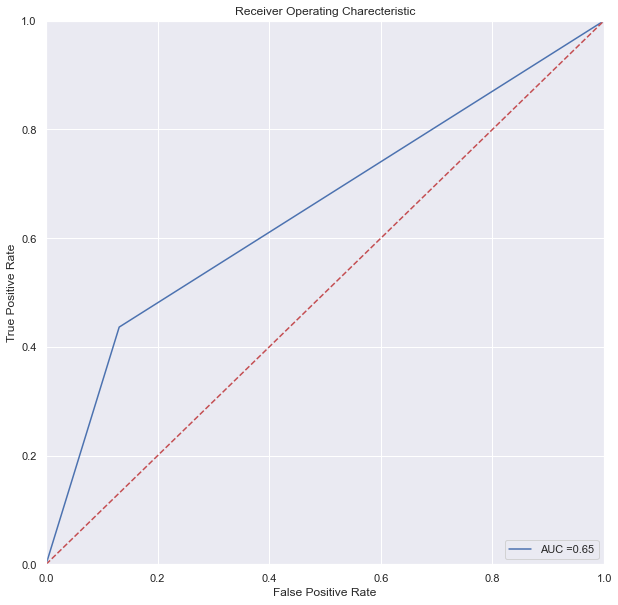

In [107]:
fpr,tpr,threshold = metrics.roc_curve(y_test,log_reg_pred_test)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Support Vector Machine

In [108]:
from sklearn.svm import SVC

In [109]:
svc_result = SVC()
svc_result.fit(X_train,y_train)

C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [110]:
from sklearn.metrics import accuracy_score
svc_result_pred_train = svc_result.predict(X_train)
svc_result_acc_train = accuracy_score(y_train,svc_result_pred_train)

In [111]:
print("Accuracy of SVC for training data is :","{:.2f}%".format(100*svc_result_acc_train))

Accuracy of SVC for training data is : 90.38%


In [112]:
from sklearn.metrics import accuracy_score
svc_result_pred_test = svc_result.predict(X_test)
svc_result_acc_test = accuracy_score(y_test,svc_result_pred_test)

In [113]:
print("Accuracy of SVC for testing data is :","{:.2f}%".format(100*svc_result_acc_test))

Accuracy of SVC for testing data is : 74.00%


In [114]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve

In [115]:
roc_auc_score(y_test,svc_result_pred_test)

0.5949843260188088

In [116]:
from sklearn import metrics

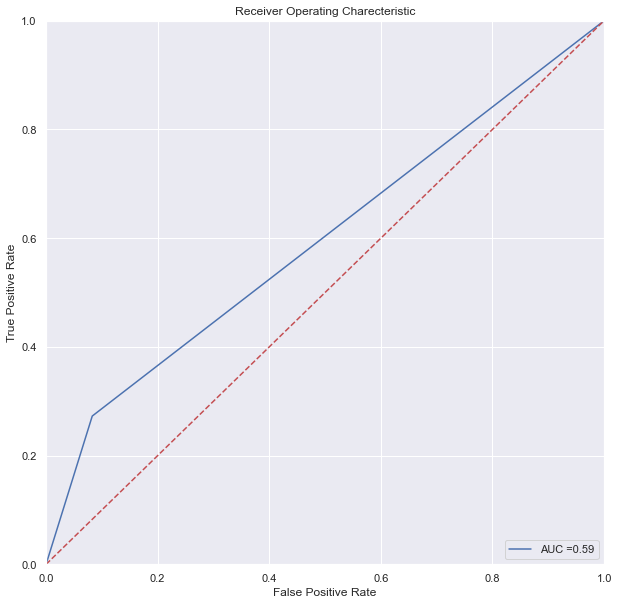

In [117]:
fpr,tpr,threshold = metrics.roc_curve(y_test,svc_result_pred_test)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
params = {
    'C':[50,10,1.0, 0.1, 0.01],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['scale']
}

grid_search_svc_result = GridSearchCV(svc_result,params,cv=5,n_jobs=-1,verbose=1)
grid_search_svc_result.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=1)

In [120]:
print(grid_search_svc_result.best_params_)

{'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [121]:
print(grid_search_svc_result.best_score_)

0.8162499999999999


In [122]:
grid_search_svc_result.best_estimator_

SVC(kernel='sigmoid')

In [123]:
dtc = grid_search_svc_result.best_estimator_

In [124]:
y_pred = svc_result.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc_result.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy of SVM Tree is:","{:.2f}%".format (100 * svc_train_acc))
print("Testing accuracy of SVM Tree is:","{:.2f}%".format (100 * svc_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of SVM Tree is: 90.38%
Testing accuracy of SVM Tree is: 74.00%
[[133  12]
 [ 40  15]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       145
           1       0.56      0.27      0.37        55

    accuracy                           0.74       200
   macro avg       0.66      0.59      0.60       200
weighted avg       0.71      0.74      0.71       200



In [126]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics

In [127]:
roc_auc_score(y_test,y_pred)

0.5949843260188088

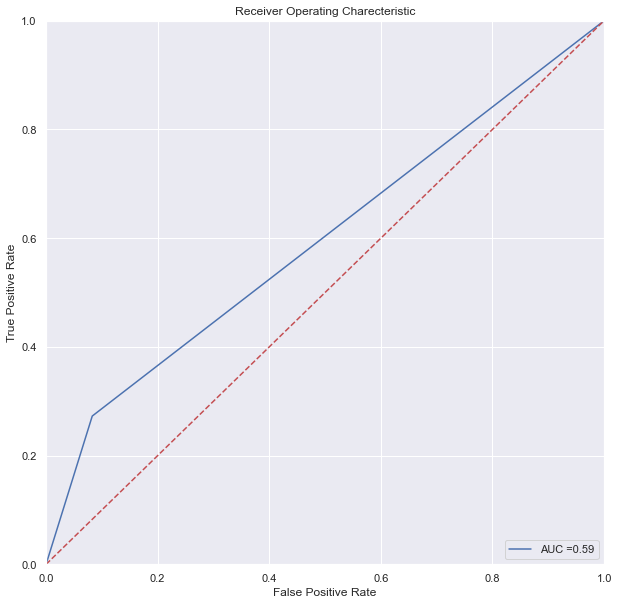

In [128]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn = KNeighborsClassifier(n_neighbors=30)

In [131]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [132]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn_train_acc = accuracy_score(y_train,knn.predict(X_train))
knn_test_acc = accuracy_score(y_test,y_pred)

print("Training score of KNN is :","{:.2f}%".format (100 *knn_train_acc))
print("Testing score of KNN is : ","{:.2f}%".format (100 *knn_test_acc))
      
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score of KNN is : 76.50%
Testing score of KNN is :  72.50%
[[145   0]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve

In [134]:
roc_auc_score(y_test,y_pred)

0.5

In [135]:
from sklearn import metrics

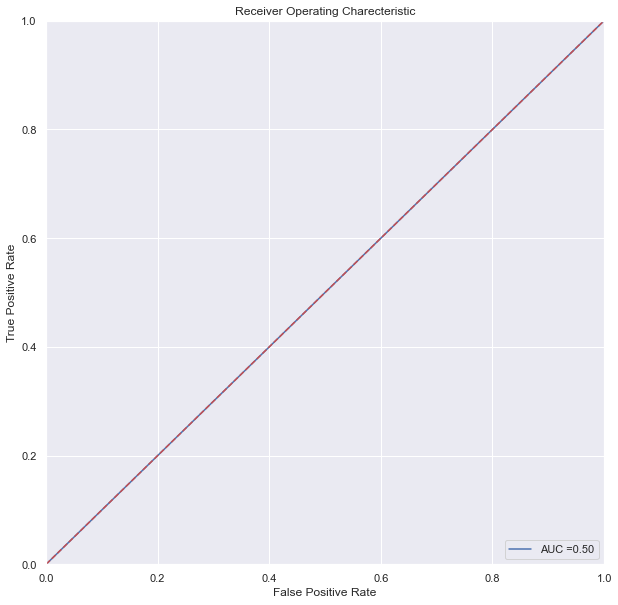

In [136]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision tree Clasifier

In [137]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test,y_pred)

print("Training accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_train_acc))
print("Testing accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Decision Tree is: 100.00%
Testing accuracy of Decision Tree is: 66.00%
[[110  35]
 [ 33  22]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       145
           1       0.39      0.40      0.39        55

    accuracy                           0.66       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.66      0.66      0.66       200



In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
params = {
    'criterion':['gini','entropy'],
    'max_depth': [3,5,7,10],
    'min_samples_split': range (2,10,1),
    'min_samples_leaf': range (2,10,1)    
}

grid_search_dt = GridSearchCV(dtc,params,cv=5,n_jobs=-1,verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [141]:
print(grid_search_dt.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [142]:
print(grid_search_dt.best_score_)

0.8162499999999999


In [143]:
grid_search_dt.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [144]:
grid_search_dt.estimator.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [145]:
dtc = grid_search_dt.best_estimator_

In [146]:
y_pred = dtc.predict(X_test)

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_train_acc))
print("Testing accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is: 81.88%
Testing accuracy of Decision Tree is: 78.00%
[[120  25]
 [ 19  36]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       145
           1       0.59      0.65      0.62        55

    accuracy                           0.78       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.79      0.78      0.78       200



In [148]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics

In [149]:
roc_auc_score(y_test,y_pred)

0.7410658307210031

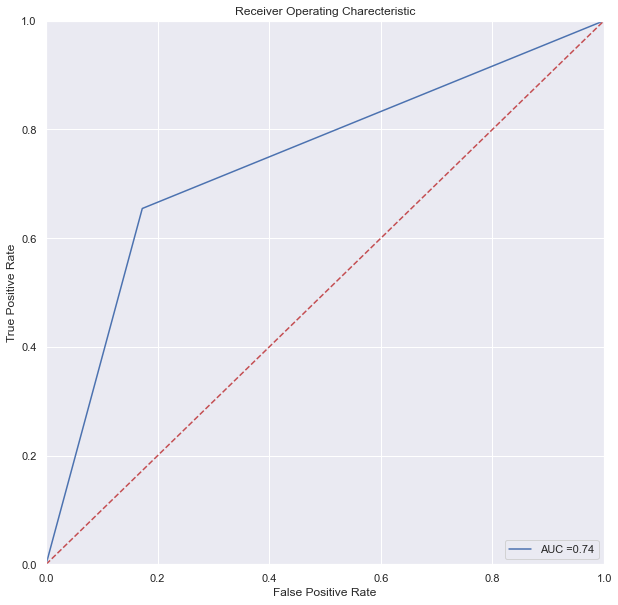

In [150]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
rand_clf = RandomForestClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=3,n_estimators=140)

In [153]:
rand_clf.fit(X_train,y_train)
y_pred = rand_clf.predict(X_test)

C:\Users\ajohnbos\AppData\Local\Temp\ipykernel_16456\897183565.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_clf.fit(X_train,y_train)


In [154]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [155]:
rand_clf_train_acc = accuracy_score(y_train,rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test,y_pred)

print("Training accuracy of Random forest classifier is:","{:.2f}%".format(100*rand_clf_train_acc))
print("Testing accuracy of Random forest classifier is:","{:.2f}%".format(100*rand_clf_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Random forest classifier is: 93.88%
Testing accuracy of Random forest classifier is: 67.00%
[[133  12]
 [ 54   1]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       145
           1       0.08      0.02      0.03        55

    accuracy                           0.67       200
   macro avg       0.39      0.47      0.42       200
weighted avg       0.54      0.67      0.59       200



In [156]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics

In [157]:
roc_auc_score(y_test,y_pred)

0.4677115987460815

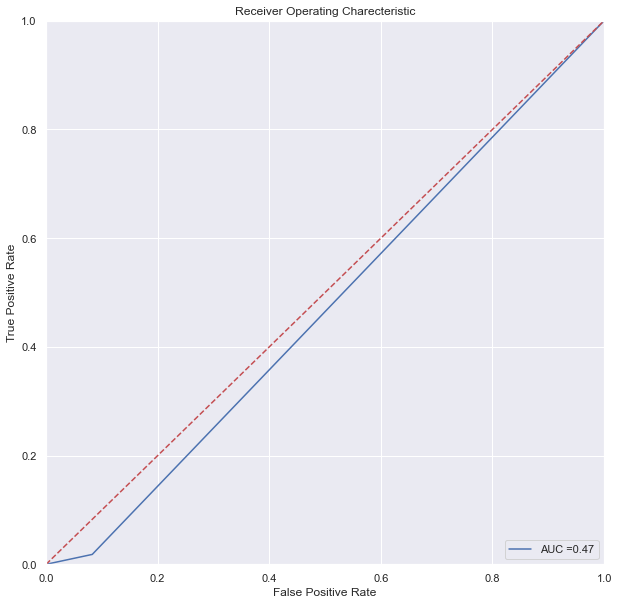

In [158]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [159]:
parameters = {
    'n_estimators': [50,70,90,120,180,200],
    'max_features': ['sqrt', 'log2'],
}

grid_search_rand_clf = GridSearchCV(rand_clf,parameters,n_jobs=-1,cv=5,verbose=1)
grid_search_rand_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              min_samples_split=3,
                                              n_estimators=140),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [160]:
print(grid_search_rand_clf.best_params_)
print(grid_search_rand_clf.best_score_)
print(grid_search_rand_clf.best_estimator_)
print(grid_search_rand_clf.best_index_)

{'max_features': 'sqrt', 'n_estimators': 70}
0.78125
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_estimators=70)
1


In [161]:
ada = grid_search_rand_clf.best_estimator_

In [162]:
y_pred = rand_clf.predict(X_test)

In [163]:
rand_clf_train_acc = accuracy_score(y_train,ada.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test,y_pred)

print("Training accuracy of Ada Boost classifier is:","{:.2f}%".format(100*rand_clf_train_acc))
print("Testing accuracy of Ada Boost classifier is:","{:.2f}%".format(100*rand_clf_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Ada Boost classifier is: 93.88%
Testing accuracy of Ada Boost classifier is: 67.00%
[[133  12]
 [ 54   1]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       145
           1       0.08      0.02      0.03        55

    accuracy                           0.67       200
   macro avg       0.39      0.47      0.42       200
weighted avg       0.54      0.67      0.59       200



In [164]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics

In [165]:
roc_auc_score(y_test,y_pred)

0.4677115987460815

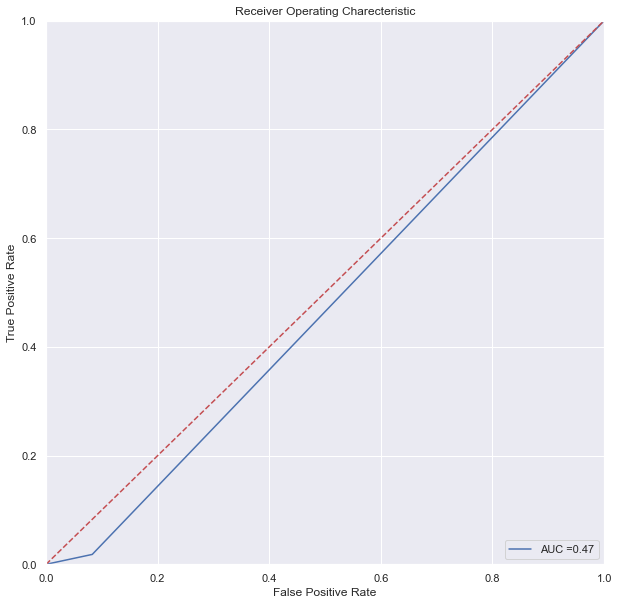

In [166]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Ada Boost Classifier

In [167]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [168]:
ada = AdaBoostClassifier(base_estimator=dtc)

In [169]:
parameters = {
    'n_estimators': [50,70,90,120,180,200],
    'learning_rate': [0.001,0.01,0.1,1,10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(ada,parameters,n_jobs=-1,cv=5,verbose=1)
grid_search_ada.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=9)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [170]:
print(grid_search_ada.best_params_)
print(grid_search_ada.best_score_)
print(grid_search_ada.best_estimator_)
print(grid_search_ada.best_index_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
0.8162499999999999
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         min_samples_leaf=9),
                   learning_rate=0.001)
0


In [171]:
ada = grid_search_ada.best_estimator_

In [172]:
y_pred = ada.predict(X_test)

In [173]:
ada_train_acc = accuracy_score(y_train,ada.predict(X_train))
ada_test_acc = accuracy_score(y_test,y_pred)

print("Training accuracy of Ada Boost classifier is:","{:.2f}%".format(100*ada_train_acc))
print("Testing accuracy of Ada Boost classifier is:","{:.2f}%".format(100*ada_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Ada Boost classifier is: 81.88%
Testing accuracy of Ada Boost classifier is: 78.00%
[[120  25]
 [ 19  36]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       145
           1       0.59      0.65      0.62        55

    accuracy                           0.78       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.79      0.78      0.78       200



In [174]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics

In [175]:
roc_auc_score(y_test,y_pred)

0.7410658307210031

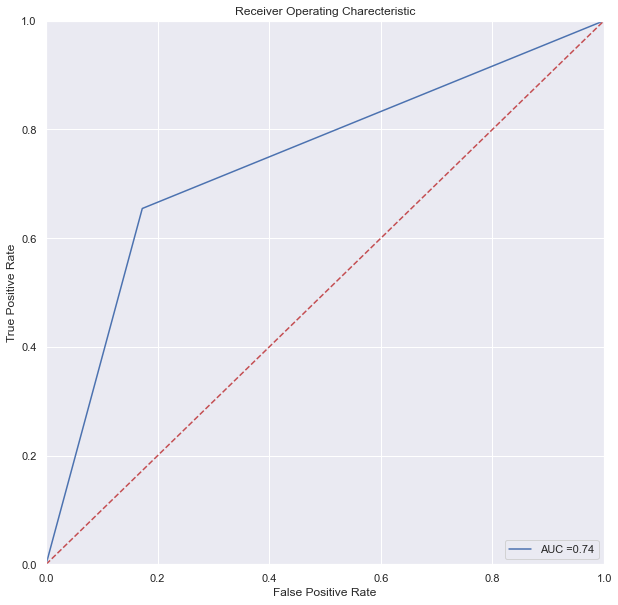

In [176]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting Classifier

In [177]:
from sklearn.ensemble import GradientBoostingClassifier

In [178]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [179]:
y_pred = gb.predict(X_test)

In [180]:
gb_train_acc = accuracy_score(y_train,gb.predict(X_train))
gb_test_acc = accuracy_score(y_test,y_pred)

print("Training accuracy of Gradient Boosting classifier is:","{:.2f}%".format(100*gb_train_acc))
print("Testing accuracy of Gradient Boosting classifier is:","{:.2f}%".format(100*gb_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Gradient Boosting classifier is: 90.75%
Testing accuracy of Gradient Boosting classifier is: 75.00%
[[125  20]
 [ 30  25]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       145
           1       0.56      0.45      0.50        55

    accuracy                           0.75       200
   macro avg       0.68      0.66      0.67       200
weighted avg       0.74      0.75      0.74       200



In [181]:
roc_auc_score(y_test,y_pred)

0.6583072100313478

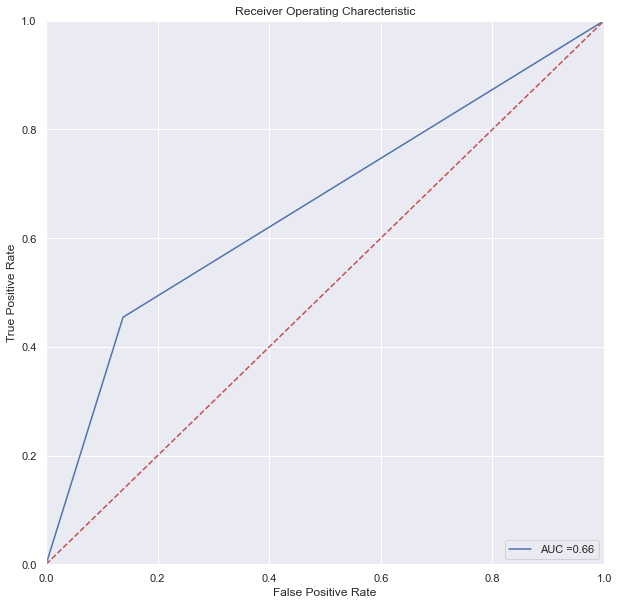

In [182]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Stochastic Gradient Boosting (SGB)

In [183]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier
sgb_acc_train = accuracy_score(y_train, sgb.predict(X_train))
sgb_acc_test = accuracy_score(y_test, sgb.predict(X_test))

print("Training Accuracy of Stochastic Gradient Boosting is","{:.2f}%".format(100* sgb_acc_train))
print(f"Test Accuracy of Stochastic Gradient Boosting is","{:.2f}%".format(100* sgb_acc_test))

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

C:\Users\ajohnbos\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy of Stochastic Gradient Boosting is 90.88%
Test Accuracy of Stochastic Gradient Boosting is 73.50%
Confusion Matrix :- 
[[127  18]
 [ 35  20]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       145
           1       0.53      0.36      0.43        55

    accuracy                           0.73       200
   macro avg       0.66      0.62      0.63       200
weighted avg       0.71      0.73      0.72       200



In [184]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics

In [185]:
roc_auc_score(y_test,y_pred)

0.6583072100313478

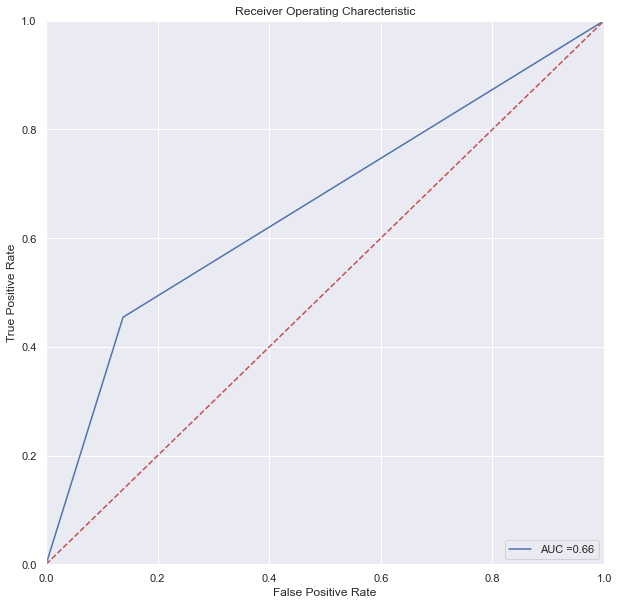

In [186]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XgBoost Classifier

In [187]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [188]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is :","{:.2f}%".format(100* xgb_train_acc))
print(f"Test accuracy of XgBoost is :","{:.2f}%".format(100* xgb_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 100.00%
Test accuracy of XgBoost is : 71.50%
[[123  22]
 [ 35  20]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       145
           1       0.48      0.36      0.41        55

    accuracy                           0.71       200
   macro avg       0.63      0.61      0.61       200
weighted avg       0.70      0.71      0.70       200



In [189]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid_search_xg = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search_xg.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[20:08:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [190]:
grid_search_xg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [191]:
# best estimator 

xgb = grid_search_xg.best_estimator_

y_pred = xgb.predict(X_test)

In [192]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy of XgBoost is :","{:.2f}%".format(100*xgb_train_acc))
print("Test accuracy of XgBoost is :","{:.2f}%".format(100*xgb_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 81.88%
Test accuracy of XgBoost is : 77.50%
[[120  25]
 [ 20  35]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       145
           1       0.58      0.64      0.61        55

    accuracy                           0.78       200
   macro avg       0.72      0.73      0.73       200
weighted avg       0.78      0.78      0.78       200



In [193]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics

In [194]:
roc_auc_score(y_test,y_pred)

0.731974921630094

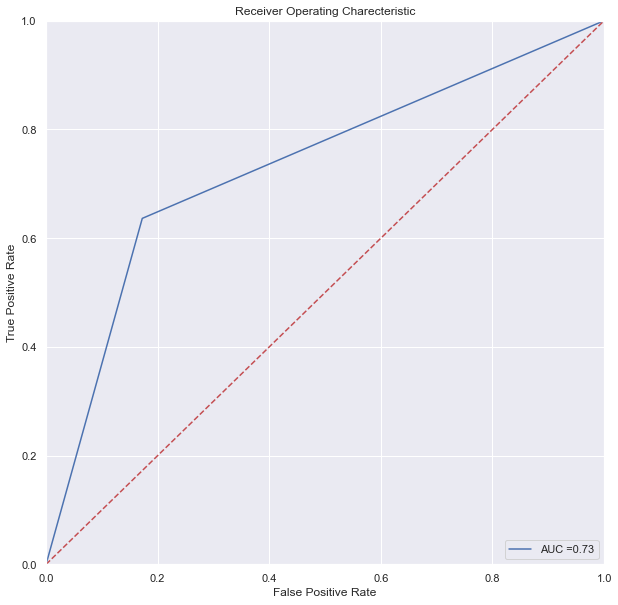

In [195]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
f, ax = plt.subplots(figsize=(10,10))
plt.title("Receiver Operating Charecteristic")
plt.plot(fpr,tpr,'b',label = 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [196]:
models = pd.DataFrame({
    'Model' : ['LogisticRegression','SVM', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'XGBoost'],
    'Score' : [log_reg_acc_test,svc_result_acc_test,knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc, sgb_acc_test,xgb_test_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Decision Tree,0.780
5,Ada Boost,0.780
8,XGBoost,0.775
0,LogisticRegression,0.750
6,Gradient Boost,0.750
1,SVM,0.740
7,SGB,0.735
2,KNN,0.725
4,Random Forest,0.670


In [197]:
##px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

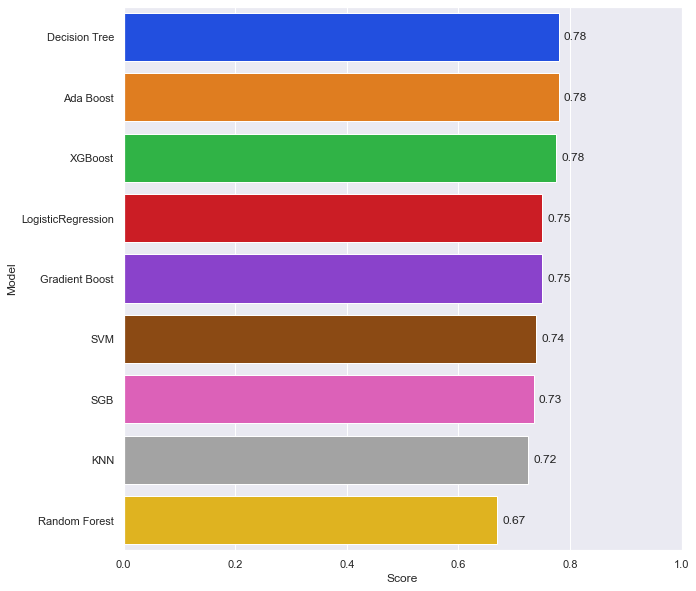

In [198]:
fig,ax = plt.subplots(figsize=(10,10))
barplot =sns.barplot(data=models,x='Score', y='Model',palette='bright',order=models.sort_values('Score',ascending=False).Model,ax=ax)
ax.set(xlim=(0,1))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

###### Create a pickle file using serialization

In [200]:
pickle_out = open("dtc.pkl", "wb")
pickle.dump(dtc,pickle_out)
pickle_out.close()